In [1]:
std::string histfile = "par_sub.root";
TFile *fin = new TFile(histfile.c_str());
TCanvas *c = new TCanvas("c", "", 600, 600);
TH2F *h2d = (TH2F *) fin->Get("h_bJet_zgB")->Clone();
TH1F *h1d;
Float_t minpt;
Float_t maxpt;
int firstbin;
int lastbin;

In [2]:
minpt = 100;
firstbin = h2d->GetYaxis()->FindBin(minpt);
maxpt = 150;
lastbin = h2d->GetYaxis()->FindBin(maxpt);

In [3]:
h1d = (TH1F *) h2d->ProjectionX("h1d", firstbin, lastbin);

In [4]:
/*
h2d->GetYaxis()->SetCanExtend(1);
h2d->GetYaxis()->SetRange(firstbin, lastbin);

h2d->GetXaxis()->SetCanExtend(1);
//h2d->GetXaxis()->SetRange(0, h2d->GetXaxis()->GetNbins());

h2d->Draw("COLZ");
//c->Draw();
*/

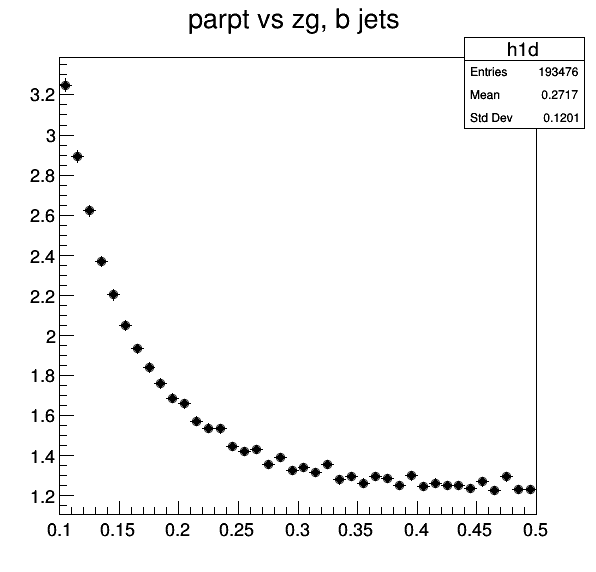

Integral without (?) underflow : 62.7086


In [6]:
h1d = (TH1F *) h2d->ProjectionX("h1d", firstbin, lastbin)->Clone();

//h1d->GetXaxis()->SetCanExtend(1);
//h1d->GetXaxis()->SetRange(0, h1d->GetXaxis()->GetNbins());

cout << "Integral without (?) underflow : " << h1d->Integral() << endl;

h1d->Draw();
c->Draw();

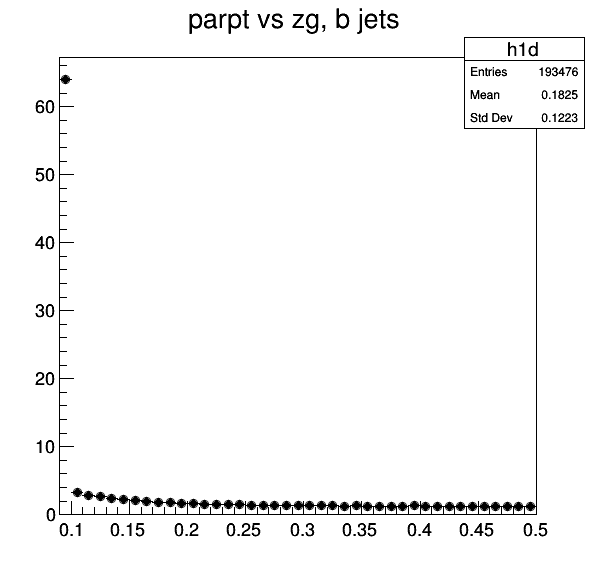

Integral with (?) underflow : 126.634


In [4]:
h1d->GetXaxis()->SetCanExtend(1);
h1d->GetXaxis()->SetRange(0, h1d->GetXaxis()->GetNbins());

cout << "Integral with (?) underflow : " << h1d->Integral() << endl;

h1d->Draw();
c->Draw();

In [12]:
cout << h1d->GetBinContent(0)

63.1969(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7fdb60eb1e00


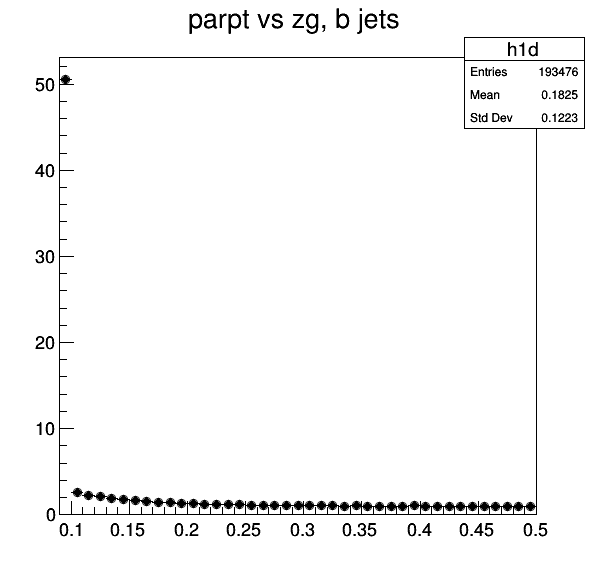

In [5]:
h1d->Scale(1/h1d->Integral("width"));
h1d->Draw();
c->Draw();

In [7]:
cout << h1d->GetBinContent(2);

2.28616

In [6]:
cout << h1d->Integral("width")

1(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f2bb8bc6e00


In [ ]:
h1d->

In [7]:
TH1F *hnew = (TH1F *) h1d->Rebin(5);

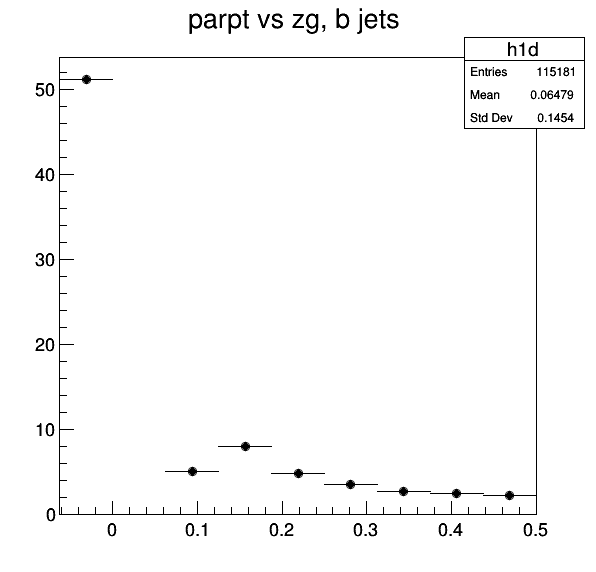

In [8]:
hnew->GetXaxis()->SetCanExtend(true);
hnew->GetXaxis()->SetRange(0, hnew->GetXaxis()->GetNbins());

hnew->Draw();
c->Draw();

In [9]:
cout << hnew->Integral("width")

5(std::basic_ostream<char, std::char_traits<char> >::__ostream_type &) @0x7f455c03be00


#### Without SetRange

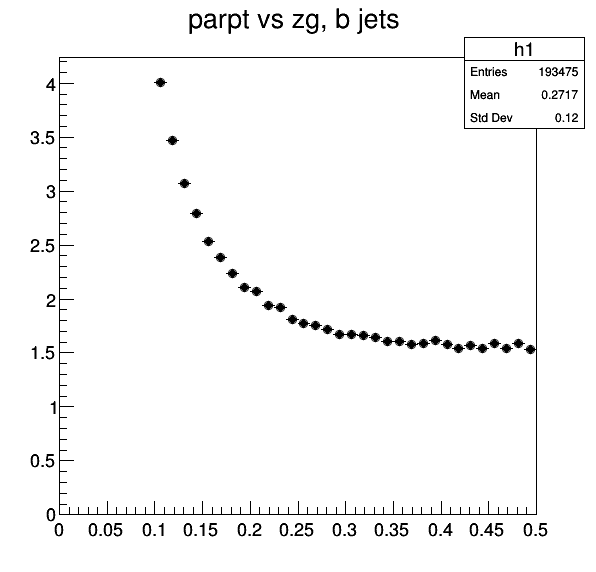

underflow: 63.9257
bin 10: 3.46711


In [3]:
h1 = (TH1F *) h2d->ProjectionX("h1", firstbin, lastbin)->Clone();

//h1d->GetXaxis()->SetCanExtend(1);
//h1d->GetXaxis()->SetRange(0, h1d->GetXaxis()->GetNbins());

h1->Draw();
c->Draw();

cout << "underflow: " << h1->GetBinContent(0) << endl;
cout << "bin 10: " << h1->GetBinContent(10) << endl;

In [23]:
int counts = 0;

In [26]:
counts = 0;
for (int i = 0; i < h1->GetNbinsX(); i++) {
    if (!(h1->GetBinContent(i) > 0)) {
        cout << "bin empty: " << i << endl;
        counts++;
    }
}
cout << "empty bins: " << counts << endl;

bin empty: 1
bin empty: 2
bin empty: 3
bin empty: 4
bin empty: 5
bin empty: 6
bin empty: 7
bin empty: 8
empty bins: 8


In [4]:
TH1F *h11;
TH1F *h12;

In [5]:
h11 = (TH1F *) h1->Rebin(5, "h11");
cout << "bin 2: " << h11->GetBinContent(2);

bin 2: 7.47147

In [6]:
h12 = (TH1F *) h1->Clone();
h12->GetXaxis()->SetRangeUser(0.1, 0.5);
h12->Rebin(5);
cout << "bin 2: " << h12->GetBinContent(2);

bin 2: 7.47147

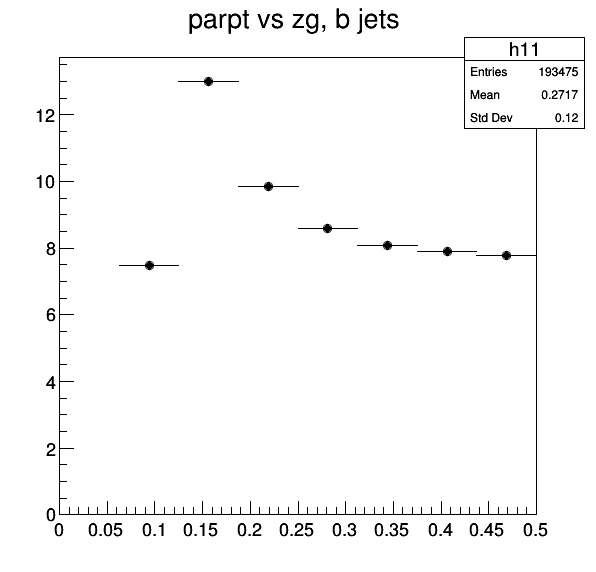

In [7]:
h11->Draw();
c->Draw();

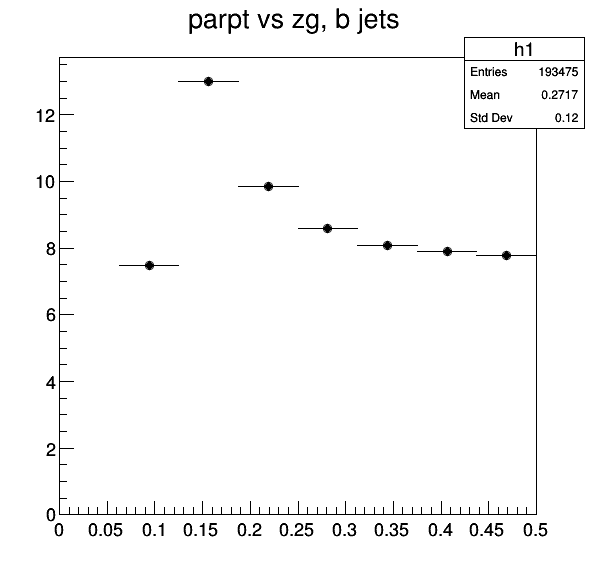

In [8]:
h12->Draw();
c->Draw();

In [1]:
std::string histfile = "kt_rgzg_par.root";
TFile *fin = new TFile(histfile.c_str());
TCanvas *c = new TCanvas("c", "", 600, 600);
fin->ls()

TFile**		kt_rgzg_par.root	
 TFile*		kt_rgzg_par.root	
  KEY: TH2F	h_qcd_ktB;1	kt vs rg, b jets
  KEY: TH2F	h_qcd_rgzgB;1	zg vs rg, b jets
  KEY: TH2F	h_qcd_ktC;1	kt vs rg, c jets
  KEY: TH2F	h_qcd_rgzgC;1	zg vs rg, c jets
  KEY: TH2F	h_qcd_ktL;1	kt vs rg, l jets
  KEY: TH2F	h_qcd_rgzgL;1	zg vs rg, l jets
  KEY: TH2F	h_bJet_ktB;1	kt vs rg, b jets
  KEY: TH2F	h_bJet_rgzgB;1	zg vs rg, b jets
  KEY: TH2F	h_bJet_ktC;1	kt vs rg, c jets
  KEY: TH2F	h_bJet_rgzgC;1	zg vs rg, c jets
  KEY: TH2F	h_bJet_ktL;1	kt vs rg, l jets
  KEY: TH2F	h_bJet_rgzgL;1	zg vs rg, l jets


In [2]:
TH2F *h2d = (TH2F *) fin->Get("h_bJet_ktB")->Clone();

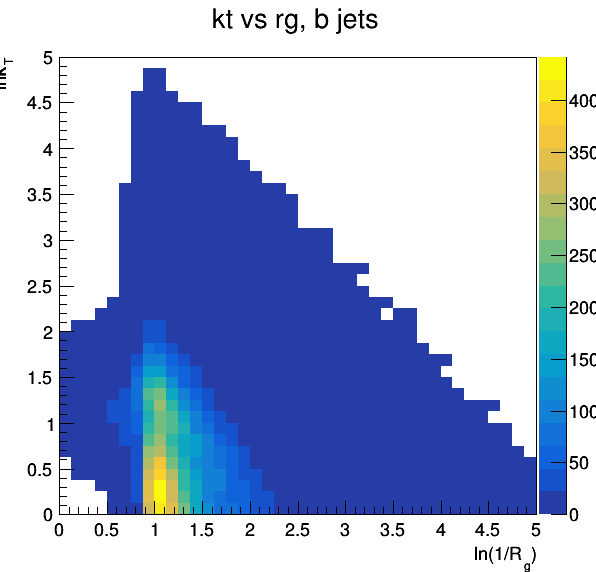

In [5]:
//h2d->GetYaxis()->SetRange(1, 10);
h2d->SetXTitle("ln(1/R_{g})");
h2d->SetYTitle("lnk_{T}");
h2d->Draw("COLZ");
c->Draw();

In [1]:
TFile *fin = new TFile("/data_CMS/cms/mnguyen//bJet2022/bJetMC/SD/merged_HiForestAOD.root");
TTree *t = (TTree *) fin->Get("ak4PFJetAnalyzer/t");
TTree *HiTree = (TTree *) fin->Get("hiEvtAnalyzer/HiTree");

In [3]:
TFile *fout = new TFile("localTree.root", "recreate");

In [5]:
TTree *newt = (TTree *) t->Clone();

In [7]:
newt = (TTree *) t->Clone("newt");

In [8]:
newt->Print();

******************************************************************************
*Tree    :newt      : ak4PFpatJetsWithBtagging Jet Analysis Tree             *
*Entries : 11442981 : Total =     15580846069 bytes  File  Size = 9786494382 *
*        :          : Tree compression factor =   1.59                       *
******************************************************************************
*Br    0 :nref      : nref/I                                                 *
*Entries : 11442981 : Total  Size=   45916182 bytes  File Size  =    8052275 *
*Baskets :     1636 : Basket Size=     437248 bytes  Compression=   5.70     *
*............................................................................*
*Br    1 :rawpt     : rawpt[nref]/F                                          *
*Entries : 11442981 : Total  Size=  175895814 bytes  File Size  =  145074742 *
*Baskets :     6453 : Basket Size=     849920 bytes  Compression=   1.21     *
*...................................................

In [ ]:
newt->Branch("weight", HiTree->GetBranch("weight")->Clone());

In [ ]:
newt->Print();

In [14]:
HiTree->GetBranch("weight")->Clone()->Print();

*Br   88 :weight    : weight/F                                               *
*Entries : 11442981 : Total  Size=   45925742 bytes  File Size  =   43456272 *
*Baskets :     1616 : Basket Size=      32000 bytes  Compression=   1.06     *
*............................................................................*


In [2]:
TTree *t1 = new TTree("t1", "dummy tree");
//t1->SetEntries(3);

In [3]:
t1->Print();

******************************************************************************
*Tree    :t1        : dummy tree                                             *
*Entries :        0 : Total =             268 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************


In [11]:
t1.SetBranchAddress("xs", &x);

In [4]:
Int_t x;

In [5]:
t1->Branch("xs", &x, "xs/I");

In [8]:
t1->Print();

******************************************************************************
*Tree    :t1        : dummy tree                                             *
*Entries :        3 : Total =             912 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :xs        : xs/I                                                   *
*Entries :        3 : Total  Size=        624 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*


In [7]:
a

In [9]:
TTree *t2 = new TTree("t2", "dummy tree");

In [10]:
t2->Print();

******************************************************************************
*Tree    :t2        : dummy tree                                             *
*Entries :        0 : Total =             268 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************


In [11]:
TBranch *b = (TBranch *) t1->GetBranch("xs");

In [12]:
b->Print();

*Br    0 :xs        : xs/I                                                   *
*Entries :        3 : Total  Size=        624 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*


In [18]:
t2->Branch("b", b);

In [19]:
for (int i = 0; i < 3; i++) {
    t2->Fill();
    //t1.GetEntry(i);
    //cout << x;
}

In [20]:
t2->Print();

******************************************************************************
*Tree    :t2        : dummy tree                                             *
*Entries :        3 : Total =            7909 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Br    0 :b         : TBranch                                                *
*Entries :        3 : Total  Size=       2498 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :b         : TBranch                                                *
*Entries :        3 : Total  Size=       2498 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*...................................................